In [101]:
import os
import glob;
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RESULT_DIR = 'result'
IMG_DIR = 'img'
WELL = '5'

In [102]:
well_inference_result_dir = os.path.join(RESULT_DIR, "well_" + WELL)

if os.path.exists(well_inference_result_dir):
    result_files = glob.glob(well_inference_result_dir + "\\inference*.npy")
    truth_file = glob.glob(well_inference_result_dir + "\\ground*.npy")

In [103]:
result_dict = {}

for i in range(0, len(result_files)):
    inference_np_array = np.load(result_files[i])
#     print(len(inference_np_array))
    result_dict[f"infernce_{i}"] = inference_np_array

In [104]:
df = pd.DataFrame(data=result_dict)

In [105]:
df_transposed = df.T

In [106]:
stats = pd.DataFrame(columns=['p10', 'p90'])

In [107]:
for i in range(len(df_transposed.columns)):
    p10 = df_transposed[i].quantile(0.9)
    p90 = df_transposed[i].quantile(0.1)
    stats.loc[i] = [p10, p90]

In [108]:
ground_truth = {"ground_truth": np.load(truth_file[0])}
print(len(np.load(truth_file[0])))
df_truth = pd.DataFrame(data=ground_truth)

492


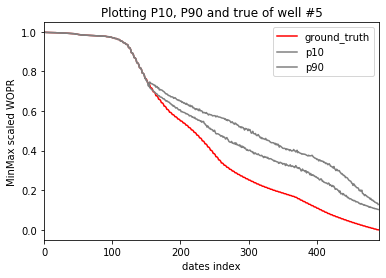

In [109]:
ax = plt.gca()

df_truth.plot(color='red', ax=ax)
stats.plot(y='p10', color = 'gray', ax = ax)
stats.plot(y='p90', color = 'gray', ax = ax)

ax.set_title(f"Plotting P10, P90 and true of well #{WELL}")
ax.set_xlabel('dates index')
ax.set_ylabel('MinMax scaled WOPR')

# plt.show()

img_extension = ".png"
img_path = os.path.join(IMG_DIR, 'p10_p90', f"well{WELL}_P10_P90{img_extension}")
plt.savefig(img_path, dpi=300)